### Some project estimation with PERT


In [6]:
from pert import PERT
import seaborn as sns


<Axes: ylabel='Density'>

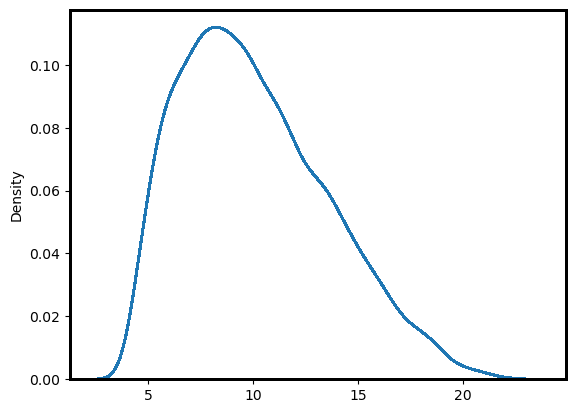

In [7]:
pert = PERT(4,8,24)
sns.kdeplot(pert.rvs(10000))

The goal here is to get a simple experimental answer to the question
"Is the sum of difficult-to-estimate task estimates more accurate than the individual estimates?"

To examine this:

1. Form several estimates,
2. sum them,
3. check the sum's distribution


The estimates, as [min,likely,max] triples:

In [8]:
ptimes = [[4,8,16],[8,16,24],[4,8,16], [8,16,24],[4,8,16], [8,16,24],[4,8,16]]

In [9]:
perts = [PERT(*est).rvs(10000) for est in ptimes]

The sum and its histogram

In [10]:
import numpy as np

In [11]:
psum = np.sum(perts, axis = 0)

In [12]:
import matplotlib.pyplot as plt

In [13]:
psum

array([92.76414125, 74.97919477, 72.81347186, ..., 74.25744529,
       86.02110874, 94.66056846])

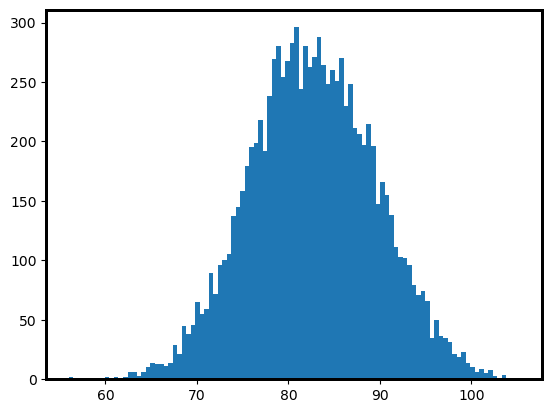

In [14]:
psumhist = plt.hist(psum, bins=100);

The x-axis are the histogram bin values, just integers

The y axis is the sum of the individual samples from the PERT distributions.  In this case, the total project time estimates.  The most common value here is also the mean, at 82.69.  The spread fits a normal distribution well, with mu and std.dev. at the bottom.

Looks like a normal curve...

Let's get a curve fit, and find the mean $\mu$ and the std.deviation $\sigma$

In [15]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


In [16]:
mu, std = norm.fit(psum)

In [17]:
xmax = max(psumhist[0])
xmin = min(psumhist[0])


In [18]:
max(psumhist[0]) 

296.0

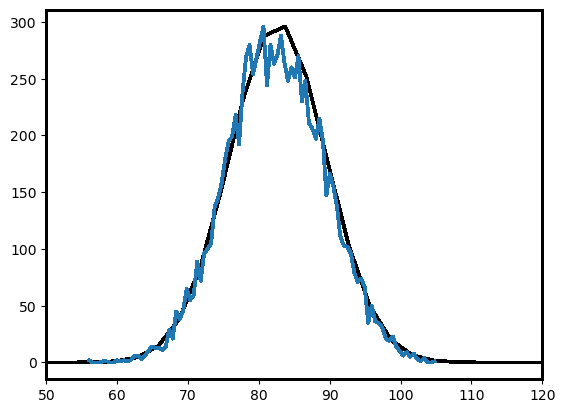

In [19]:
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.xlim([50,120])
plt.plot(x, p/max(p)*max(psumhist[0]), 'k',  psumhist[1][0:100], psumhist[0],linewidth=2)


In [20]:
mu

82.66853994790723

In [21]:
std

6.8556759811774715

Now, get the simple sums


In [23]:
sum( [mid for _, mid, _ in ptimes] )


80

In [26]:
sum( [mn for mn, _, _ in ptimes] )

40

In [27]:
sum( [mx for _, _, mx in ptimes] )

136